<a href="https://colab.research.google.com/github/Rishita32/Data_Science_Lab/blob/main/RishitaMote_Exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Name: Rishita Mote
#### UID: 2018130029
#### Batch B

### **Experiment 6**
#### Objective: To perform time series analysis: identifying the nature of the phenomenon represented by the sequence of observations, and forecasting. 

###Problem Statement:  Analysis of COVID-19's impact on India's AQI 

###Importing Libraries

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
!pip install kaggle
import os

In [3]:
#uploading kaggle json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishitamote32","key":"520018b1f14ae4e9d230cd66087de905"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

### Importing time series data from kaggle

In [5]:
#downloading dataset from kaggle
!kaggle datasets download -d rohanrao/air-quality-data-in-india

 89% 65.0M/72.9M [00:00<00:00, 131MB/s]
100% 72.9M/72.9M [00:00<00:00, 121MB/s]


In [6]:
!unzip air-quality-data-in-india.zip

Archive:  air-quality-data-in-india.zip
  inflating: city_day.csv            
  inflating: city_hour.csv           
  inflating: station_day.csv         
  inflating: station_hour.csv        
  inflating: stations.csv            


In [7]:
city_day=pd.read_csv('city_day.csv')

In [8]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [9]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [10]:
#converting column Date into DateTime format
city_day['Date']=pd.to_datetime(city_day['Date'])

In [11]:
city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


#Data-Preprocessing

            Proportion
Xylene        0.613220
PM10          0.377231
NH3           0.349734
Toluene       0.272290
Benzene       0.190410
AQI           0.158511
AQI_Bucket    0.158511
PM2.5         0.155701
NOx           0.141715
O3            0.136196
SO2           0.130507
NO2           0.121398
NO            0.121296
CO            0.069723
City          0.000000
Date          0.000000


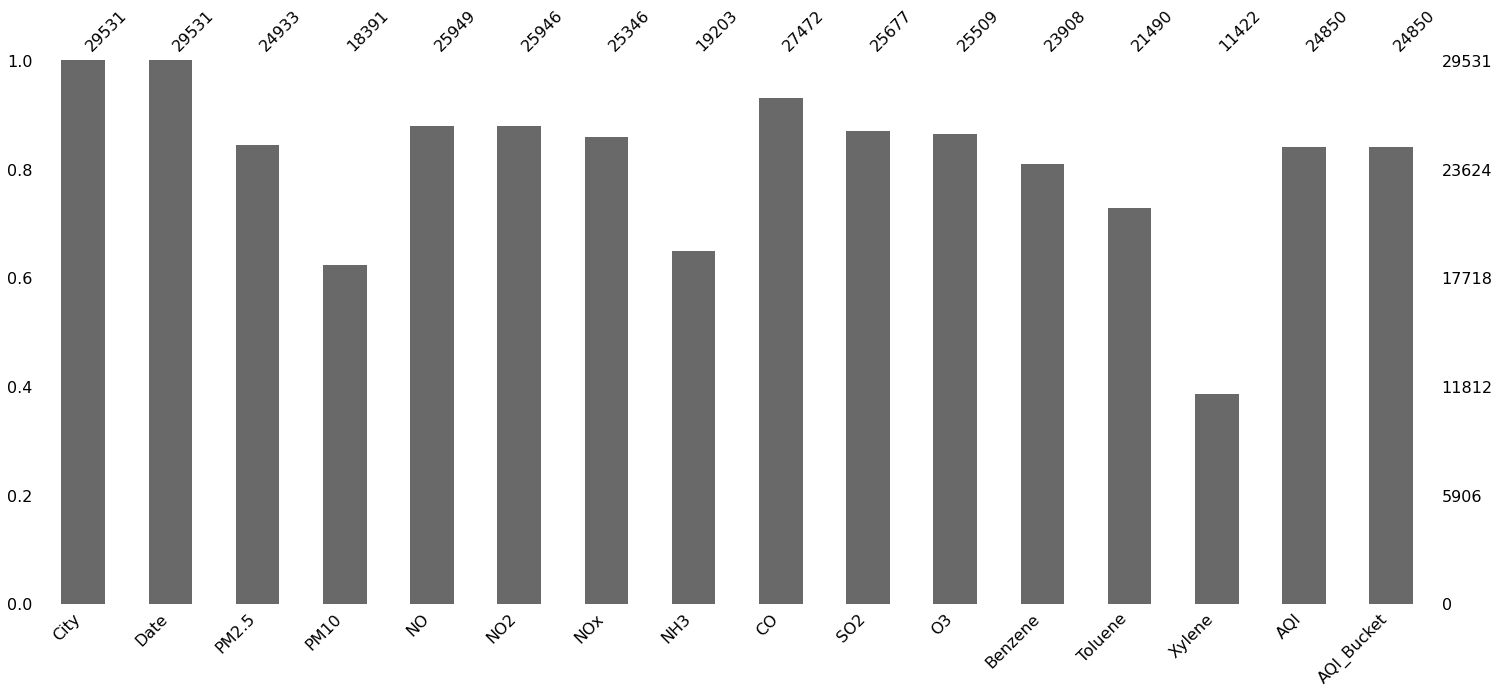

In [12]:
import missingno as msno
%matplotlib inline


#finding the proportion of missing values in each column
missing=pd.DataFrame(city_day.isna().sum()/len(city_day))
missing.columns=['Proportion']
print(missing.sort_values(by='Proportion', ascending=False))

#plotting the number of non-null values in each column
msno.bar(city_day)

#Observation: PM10 and Xylene has more null values

In [13]:
#filling missing values with zero 
city_day.fillna(0,inplace=True)

###Basic Visualisation

In [14]:
#extracting year and month for each record
city_day['year'] = pd.DatetimeIndex(city_day['Date']).year
city_day['month'] = pd.DatetimeIndex(city_day['Date']).month

#clubbing all particulate matter
city_day['PM']=city_day['PM2.5'] + city_day['PM10']

#clubbing nitrogen oxides
city_day['Nitric']=city_day['NO'] + city_day['NO2']+ city_day['NOx']

#clubbing Benzene, toluene and Xylene together
city_day['BTX']=city_day['Benzene'] + city_day['Toluene']+ city_day['Xylene']

#grouping pollutant levels in every city by year and month
city_day_group_ym=city_day.groupby(['City','year','month'])[['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']].mean()

city_day_group_ym=city_day_group_ym.reset_index(['City','year','month'])
city_day_group_ym.head()

,City,year,month,PM,Nitric,CO,NH3,O3,SO2,BTX,AQI
0,Ahmedabad,2015,1,10.668710,88.680000,22.352258,0.0,46.350645,43.602903,6.971613,33.903226
1,Ahmedabad,2015,2,103.662143,92.985714,19.482143,0.0,43.437857,56.423214,35.357143,464.857143
2,Ahmedabad,2015,3,106.905806,80.510000,13.585484,0.0,44.276774,56.975161,41.357419,378.064516
3,Ahmedabad,2015,4,101.682000,54.992667,7.306333,0.0,31.376000,51.233333,14.496333,257.200000
4,Ahmedabad,2015,5,74.919355,50.607419,8.529677,0.0,31.624194,35.977419,19.677419,254.967742


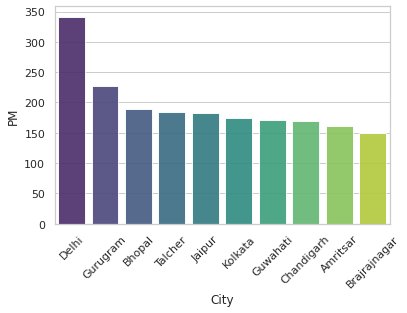

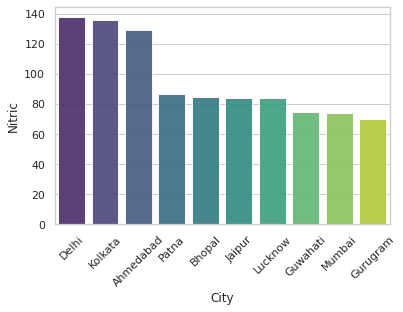

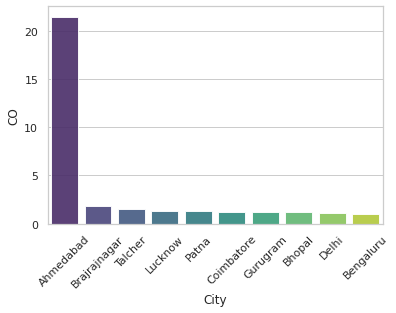

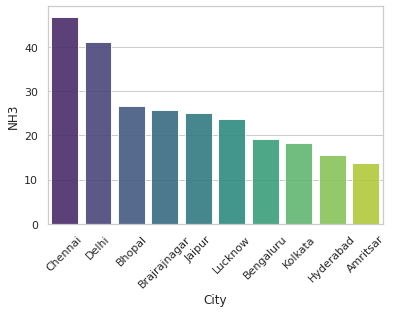

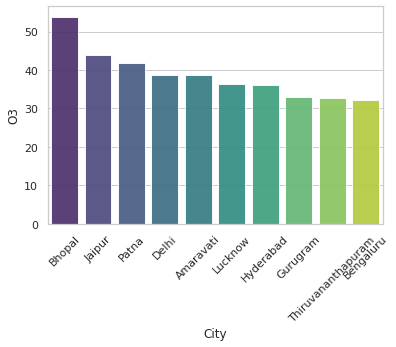

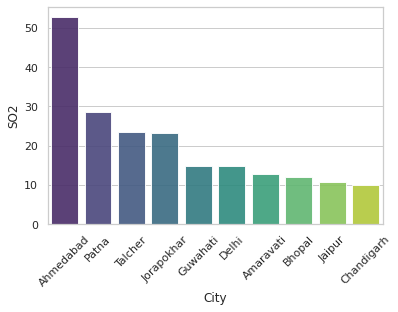

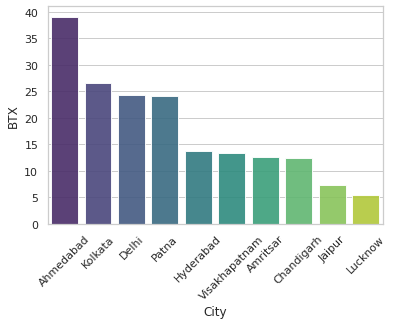

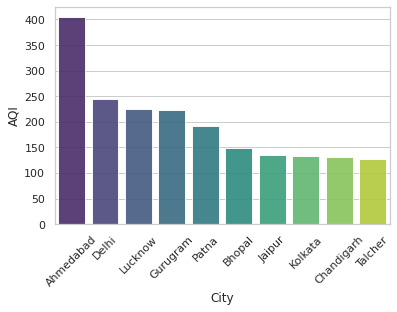

In [15]:
#taking a subset of our dataset for the last three years before 2020
city_day_17_19=city_day_group_ym[city_day_group_ym['year'].isin([2017,2018,2019])]

#list of pollutants
pollutants=['PM','Nitric','CO','NH3','O3','SO2','BTX','AQI']
sns.set_theme(style='whitegrid')

#plotting the top 10 most polluted cities for each category of pollutants, as well as overall AQI
for i in pollutants:
    df=city_day_17_19.groupby(['City'])[[i]].mean().sort_values(i,ascending=False).iloc[:10,:]
    
    df=df.reset_index(['City'])

    plt.figure()
    sns.barplot(data=df, x="City", y=i, palette="viridis", alpha=.9)
    plt.xticks(rotation=45) 

              PM    Nitric        CO       NH3        O3       SO2       BTX  \
PM      1.000000  0.626912 -0.001708  0.273868  0.414142  0.194107  0.170518   
Nitric  0.626912  1.000000  0.351381  0.205231  0.336590  0.398588  0.297628   
CO     -0.001708  0.351381  1.000000 -0.107090  0.112073  0.658116  0.342239   
NH3     0.273868  0.205231 -0.107090  1.000000  0.184410 -0.089157  0.016164   
O3      0.414142  0.336590  0.112073  0.184410  1.000000  0.298710  0.207562   
SO2     0.194107  0.398588  0.658116 -0.089157  0.298710  1.000000  0.339907   
BTX     0.170518  0.297628  0.342239  0.016164  0.207562  0.339907  1.000000   
AQI     0.589689  0.660347  0.672568  0.088668  0.404758  0.591202  0.348172   

             AQI  
PM      0.589689  
Nitric  0.660347  
CO      0.672568  
NH3     0.088668  
O3      0.404758  
SO2     0.591202  
BTX     0.348172  
AQI     1.000000  


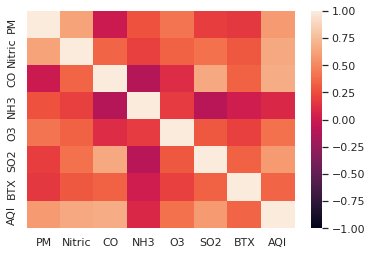

In [16]:
#plotting the correlation matrix with sns heatmap
corr_matrix = city_day_group_ym.iloc[:,3:].corr()
print(corr_matrix)
fig = plt.figure(figsize = (6, 4))
sns.heatmap(corr_matrix, vmin=-1, vmax=1)
plt.show()

#Observation: We see that BTX has the lowest correlation with AQI- which is perfectly in sync with the AQI calculation formula. 
#The air quality index is composed of 8 pollutants ((PM10, PM2.5, NO2, SO2, CO, O3, NH3, and Pb), but does not directly account for BTX.

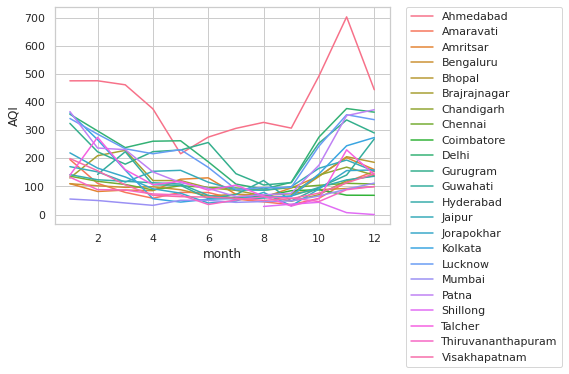

In [17]:
df_AQI_trend= city_day_17_19.groupby(['City','month'])[['AQI']].mean().reset_index()

sns.lineplot(
    data=df_AQI_trend,
    x="month", y="AQI",hue='City'
)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#Observation: AQI decreases in the summer months, which in turn means that air quality improves over these months.

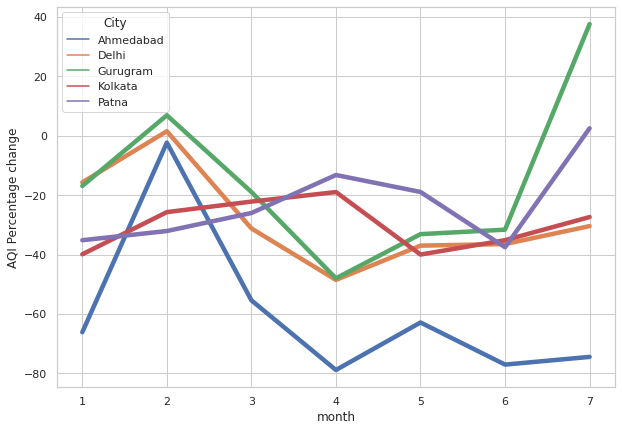

In [18]:
#Analysing the impact of COVID-19 induced lockdown on AQI

#creating a list of some of the most polluted cities
most_polluted=['Delhi','Patna','Ahmedabad','Gurugram','Kolkata']

#forming two df's- containing data from 2019 and 2020 respectively
cities_2019= city_day_group_ym[(city_day_group_ym['City'].isin(most_polluted)) & (city_day_group_ym['year']==2019)]
cities_2020= city_day_group_ym[(city_day_group_ym['City'].isin(most_polluted)) & (city_day_group_ym['year']==2020)]

cities_19_vs_20 = pd.merge(cities_2019, cities_2020, how="inner", on=["City", "month"])

#computing the percentage change in AQI
cities_19_vs_20['AQI Percentage change']=100*(cities_19_vs_20['AQI_y']-cities_19_vs_20['AQI_x'])/cities_19_vs_20['AQI_x']

#plotting AQI change for a few highly polluted cities
fig = plt.figure(figsize=(10,7))
sns.lineplot(
    data=cities_19_vs_20,
    x="month", y="AQI Percentage change",hue='City',linewidth=4.5,
    markers=True, dashes=False
)

#Observation: The general trend shows that the AQI indeed decreased for the lockdown months, signifying a major improvement in Air quality with reduced pollution levels.


In [19]:
df=city_day
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,...,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,PM,Nitric,BTX
0,Ahmedabad,2015-01-01,0.0,0.0,0.92,18.22,17.15,0.0,0.92,27.64,...,0.00,0.02,0.00,0.0,0,2015,1,0.0,36.29,0.02
1,Ahmedabad,2015-01-02,0.0,0.0,0.97,15.69,16.46,0.0,0.97,24.55,...,3.68,5.50,3.77,0.0,0,2015,1,0.0,33.12,12.95
2,Ahmedabad,2015-01-03,0.0,0.0,17.40,19.30,29.70,0.0,17.40,29.07,...,6.80,16.40,2.25,0.0,0,2015,1,0.0,66.40,25.45
3,Ahmedabad,2015-01-04,0.0,0.0,1.70,18.48,17.97,0.0,1.70,18.59,...,4.43,10.14,1.00,0.0,0,2015,1,0.0,38.15,15.57
4,Ahmedabad,2015-01-05,0.0,0.0,22.10,21.42,37.76,0.0,22.10,39.33,...,7.01,18.89,2.78,0.0,0,2015,1,0.0,81.28,28.68


We pivot the values from the 'City' column, so that we can have a comparitive view of the value of every city's AQI through every day.

Then we resample them to find the mean of every month, so now our dataset contains month-wise data.

In [20]:
cities_all = df.pivot_table(values='AQI', index=['Date'], columns='City')
cities_all=cities_all.add_suffix('_AQI')
cities=cities_all.resample(rule='MS').mean()
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Jorapokhar_AQI,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,33.903226,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
2015-02-01,464.857143,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN
2015-03-01,378.064516,NaN,NaN,NaN,46.322581,NaN,NaN,NaN,58.677419,NaN,...,NaN,NaN,NaN,93.774194,0.0,NaN,NaN,NaN,NaN,NaN
2015-04-01,257.200000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,170.000000,NaN,...,NaN,NaN,NaN,114.633333,0.0,NaN,NaN,NaN,NaN,NaN
2015-05-01,254.967742,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,NaN,137.000000,0.0,NaN,NaN,NaN,NaN,NaN


In [21]:
#form a new column containing India's AQI for every month by taking the average of all cities for that month
cities['India_AQI']=cities.mean(axis=1)
cities.head()

City,Ahmedabad_AQI,Aizawl_AQI,Amaravati_AQI,Amritsar_AQI,Bengaluru_AQI,Bhopal_AQI,Brajrajnagar_AQI,Chandigarh_AQI,Chennai_AQI,Coimbatore_AQI,...,Kochi_AQI,Kolkata_AQI,Lucknow_AQI,Mumbai_AQI,Patna_AQI,Shillong_AQI,Talcher_AQI,Thiruvananthapuram_AQI,Visakhapatnam_AQI,India_AQI
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,33.903226,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,53.741935
2015-02-01,464.857143,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,...,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,113.255102
2015-03-01,378.064516,NaN,NaN,NaN,46.322581,NaN,NaN,NaN,58.677419,NaN,...,NaN,NaN,93.774194,0.0,NaN,NaN,NaN,NaN,NaN,119.539171
2015-04-01,257.200000,NaN,NaN,NaN,113.733333,NaN,NaN,NaN,170.000000,NaN,...,NaN,NaN,114.633333,0.0,NaN,NaN,NaN,NaN,NaN,154.695238
2015-05-01,254.967742,NaN,NaN,NaN,102.774194,NaN,NaN,NaN,176.129032,NaN,...,NaN,NaN,137.000000,0.0,NaN,NaN,NaN,NaN,NaN,164.691244


###Analysing seasonality, trend and residual

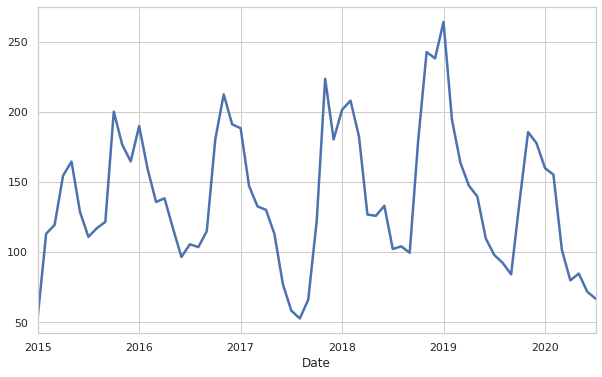

In [22]:
cities.reset_index()

sns.set_theme(style='whitegrid')

#plot India's AQI
cities['India_AQI'].plot(kind='line',grid=True,figsize=(10, 6), linewidth=2.5)

#Observtaions: From the plot above, we can visually see that there is a slight downward trend and a seasonality present.
# However, I decomposed the plot into trend, seasonality and residuals to get a clearer picture.

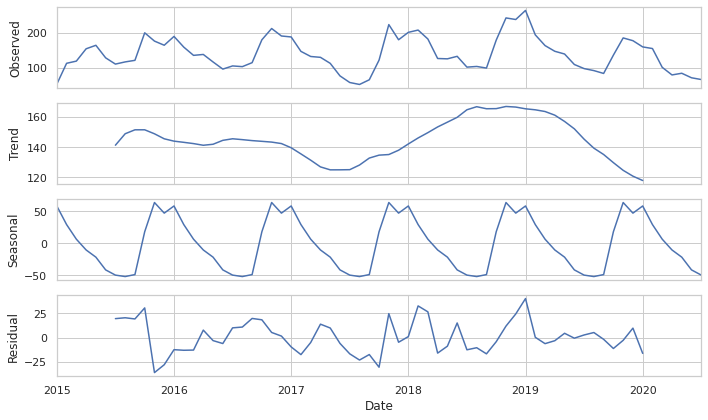

In [23]:
plt.rcParams['figure.figsize'] = (10, 6);
cities['India_AQI']=cities.mean(axis=1)
fig = seasonal_decompose(cities['India_AQI'], model='additive').plot()
#Obervation: We can see a clear seasonality and trend present here. The AQI decreases towards mid-year before rising again.

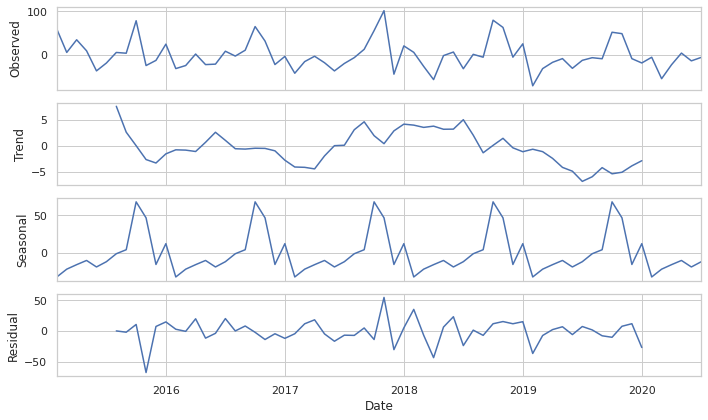

In [25]:
diff = cities['India_AQI'].diff(periods=1)
diff.dropna(inplace=True)
fig = seasonal_decompose(diff, model='additive').plot()

###Autocorrelation of time series

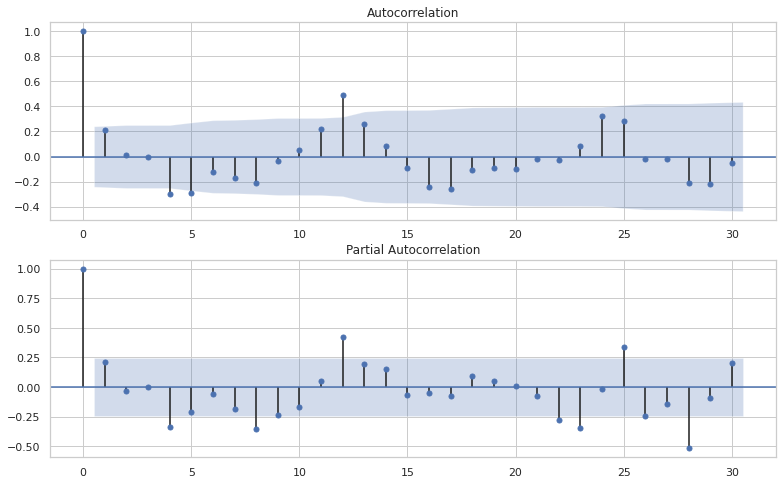

In [26]:
fig, ax = plt.subplots(2,figsize=(13, 8))
ax[0] = plot_acf(diff, lags=30, ax=ax[0])
ax[1] = plot_pacf(diff,lags=30, ax=ax[1])